
# Time series analysis
# Lund University

### Example code 5: why should one remove the initial samples when filtering?

**Reference:**  
*An Introduction to Time Series Modeling*, 4th ed, by Andreas Jakobsson  
Studentlitteratur, 2021

Lets have fun!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

import sys
import os
sys.path.insert(0, os.path.join('..', 'TimeSeriesAnalysis-main', 'TimeSeriesAnalysis-main'))
from tsa_lth.analysis import resid

# Configure matplotlib 
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1.0


###  Simulate a sinusoidal process

In [2]:
N = 100
T = 10                                # The periodicity in the data.
w0 = 2*np.pi*1/T
x = 2 * np.sin(w0*np.arange(1, N+1) + np.random.rand()*2*np.pi)  
w = np.random.randn(N)              
y = x + w

# Remove a periodicity of T.
AS = np.concatenate([[1], np.zeros(T-1), [-1]])  
z1 = signal.lfilter(AS, 1, y)                   
z2 = signal.lfilter(AS, 1, x)                    


### Plot the resulting filtered signals
Notice that if you would just plot the differentiated data with noise, it is not obvious that the initial T samples are corrupted.

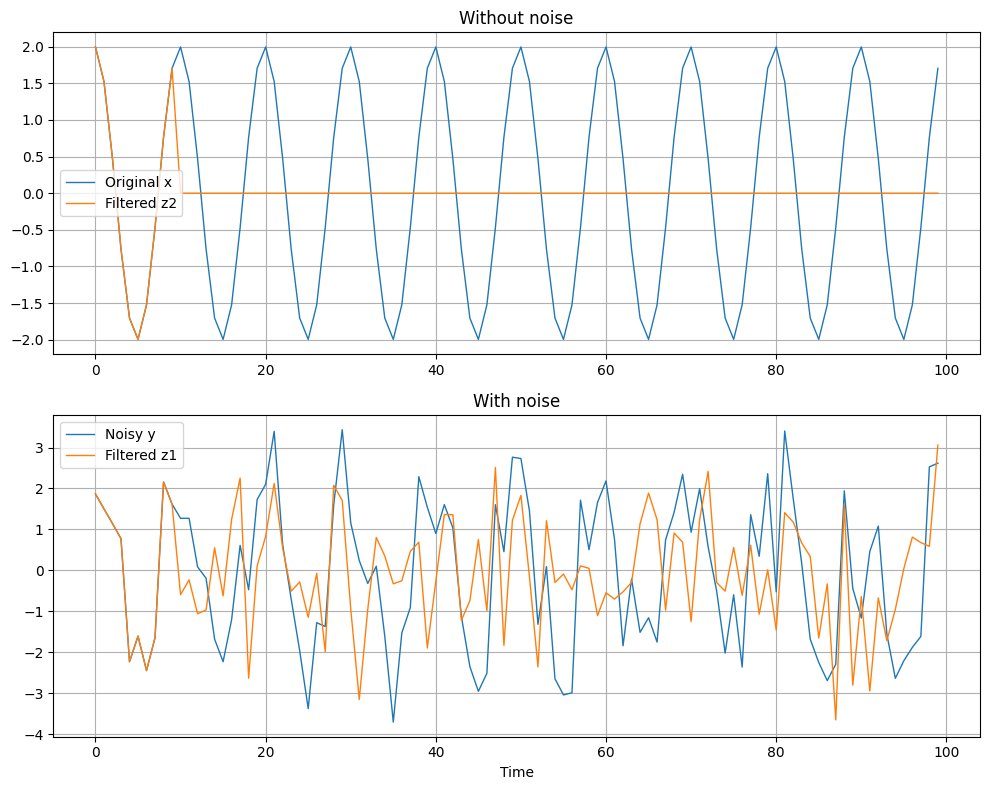

In [3]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(x, label='Original x')       
plt.plot(z2, label='Filtered z2')
plt.title('Without noise')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, label='Noisy y')          
plt.plot(z1, label='Filtered z1')
plt.title('With noise')
plt.xlabel('Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Compute the residual using resid instead 
Note that the initial samples are now just set to zero!

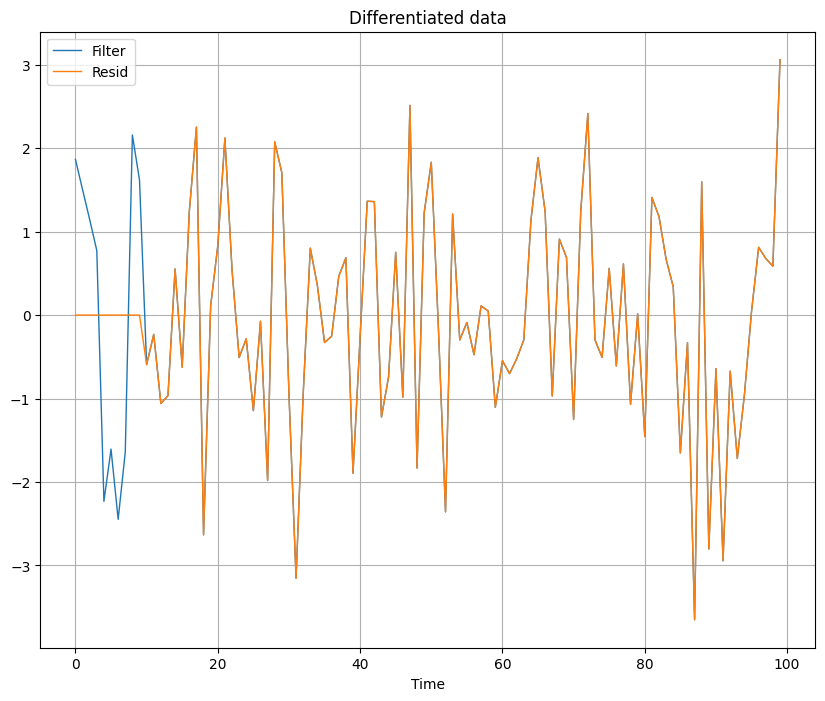

In [4]:

eh_y = signal.lfilter(AS, 1, y)
# Set the initial corrupted samples to zero 
p = len(AS)
eh_y[:p-1] = 0

plt.figure()
plt.plot(z1, label='Filter')
plt.plot(eh_y, label='Resid')
plt.title('Differentiated data')
plt.legend(['Filter', 'Resid'])
plt.xlabel('Time')
plt.grid(True)
plt.show()
